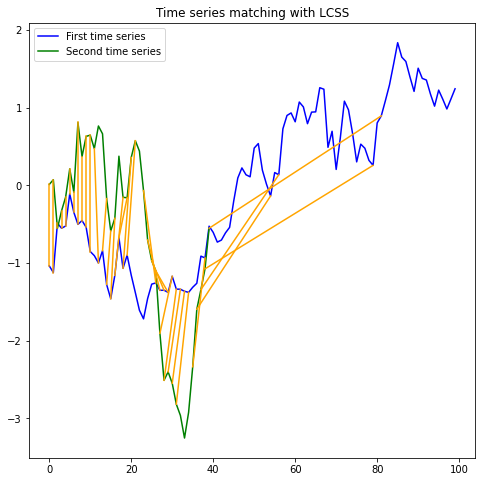

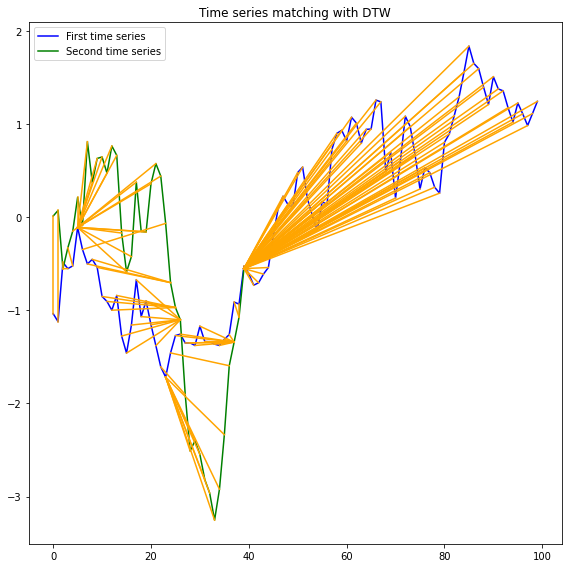

In [1]:
import numpy
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics


numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d, random_state=5)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

lcss_path, sim_lcss = metrics.lcss_path(dataset_scaled[0, :, 0], dataset_scaled[1, :40, 0], eps=1.5)
dtw_path, sim_dtw = metrics.dtw_path(dataset_scaled[0, :, 0], dataset_scaled[1, :40, 0])

plt.figure(1, figsize=(8, 8))

plt.plot(dataset_scaled[0, :, 0], "b-", label='First time series')
plt.plot(dataset_scaled[1, :40, 0], "g-", label='Second time series')

for positions in lcss_path:
    plt.plot([positions[0], positions[1]],
             [dataset_scaled[0, positions[0], 0], dataset_scaled[1, positions[1], 0]], color='orange')
plt.legend()
plt.title("Time series matching with LCSS")

plt.figure(2, figsize=(8, 8))
plt.plot(dataset_scaled[0, :, 0], "b-", label='First time series')
plt.plot(dataset_scaled[1, :40, 0], "g-", label='Second time series')

for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
             [dataset_scaled[0, positions[0], 0], dataset_scaled[1, positions[1], 0]], color='orange')

plt.legend()
plt.title("Time series matching with DTW")

plt.tight_layout()
plt.show()
